#Análise de dados dos alunos do projeto nanodegree da udacity, para isso utilizaremos os arquivos: enrollments.csv, daily_engagement.csv e project_submissions.csv


In [ ]:
!pip install unicodecsv

In [ ]:
import unicodecsv

def read_csv(filename):  #criando uma lista com cada linha de cada csv
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [ ]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [ ]:
daily_engagement[0]
for d in daily_engagement:
  d['account_key'] = d['acct']   #alterando a chave 'acct' de daily_engagement.csv para 'account_key' assim padronizando a chave de identificação
  del d['acct']
daily_engagement[0]

OrderedDict([('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0'),
             ('account_key', '0')])

In [ ]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [ ]:
def unique(lista):
  unique_students = set()
  for k in lista:
    unique_students.add(k['account_key'])
  n = len(unique_students)
  return n

def unique_students_daily(lista):
  unique_students = set()
  for u in lista:
    unique_students.add(u['account_key'])
  return unique_students

unique_enrollments = unique(enrollments)
print(unique_enrollments)
unique_daily = unique(daily_engagement)
print(unique_daily)
unique_projects = unique(project_submissions)
print(unique_projects)

#Neste código crio uma função que retorna o número de alunos únicos em cada csv
#E uma que retorna um conjunto com o 'account_key' desses alunos únicos

#OBS: É POSSIVEL VER QUE A TABELA ENROLLMENTS TEM MAIS ALUNOS QUE A DE ENGAGEMENT OQ NAO DEVIA OCORRER
#MAS OCORRE POIS EXISTEM ALUNOS QUE CANCELARAM A MATRÍCULA ANTES DE COMPLETAR 24 HORAS

1302
1237
743


In [ ]:
daily_engagement[0]['account_key']

'0'

In [ ]:
students_daily = unique_students_daily(daily_engagement)
for enrollment in enrollments:
  student = enrollment['account_key']
  if student not in students_daily and enrollment['days_to_cancel'] != '0':
    print(enrollment)

#verificando se existem mais casos inesperados que nao cancelaram a matricula em menos de 24 horas 

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', '2015-01-10'), ('cancel_date', '2015-03-10'), ('days_to_cancel', '59'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', '2015-03-10'), ('cancel_date', '2015-06-17'), ('days_to_cancel', '99'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', '2015-02-25'), ('cancel_date', ''), ('days_to_cancel', ''), ('is_udacity', 'True'), ('is_canceled', 'False')])


In [ ]:
udacity_test_acoounts = set()
for enrollment in enrollments:
  if enrollment['is_udacity'] == 'True':
    udacity_test_acoounts.add(enrollment['account_key'])
len(udacity_test_acoounts)

#NO CASO ACIMA TODAS CONTAS SÃO CONTAS TESTES DA UDACITY, ENTAO PODEMOS EXCLUI-LAS PARA ANALISAR MELHOR OS DADOS


6

In [ ]:
print(udacity_test_acoounts)

{'1069', '1101', '312', '1304', '448', '818'}


In [ ]:
def remove_udacity_accounts(lista):
  non_udacity = []
  for k in lista:
    if k['account_key'] not in udacity_test_acoounts:
      non_udacity.append(k)
  return non_udacity

In [ ]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments), len(non_udacity_engagement), len(non_udacity_submissions))
#novas listas agora sem as contas de teste da udacity

1622 135656 3634


#ALTERANDO OS TIPOS DE DADOS PARA TRABALHARMOS MELHOR COM ELES


In [ ]:
from datetime import datetime as dt

In [ ]:
def parse_date(date):
  if date == '':
    return None
  else:
    return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
  if i == '':
    return None
  else:
    return int(i)

for enrollment in enrollments:
  enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
  enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
  enrollment['is_canceled'] = enrollment['is_canceled'] == 'True' 
  enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
  enrollment['join_date'] = parse_date(enrollment['join_date'])

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [ ]:
for engagement_record in daily_engagement:
  engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
  engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
  engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
  engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
  engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [ ]:
for submission in project_submissions:
  submission['creation_date'] = parse_date(submission['creation_date'])
  submission['completion_date'] = parse_date(submission['completion_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Criando um dicionário que tem como chave a 'account_key' e como elementos a data de matrícula desses alunos, e a restrição é que esses alunos não serão contas teste da udacity, estão matriculados ('days_to_cancel' = None) ou ficaram matriculados por mais de 7 dias


In [ ]:
paid_students = {}
for enrollment in non_udacity_enrollments:
  if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7:
    if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:  
      paid_students.update( {enrollment['account_key'] : enrollment['join_date']})

In [ ]:
print(len(paid_students)) #número de alunos que atendem esses requisitos

995


# O objetivo agora é saber quantos alunos são alunos pagos e estão na primeira semana

Para isso defini uma função que recebe a data de matricula e a 'utc_date' e retorna True se estiver na primeira semana


In [ ]:
def within_one_week(join_date, engagement_date):
  time_diff = engagement_date - join_date
  return time_diff.days < 7 and time_diff.days >= 0

E também defini uma que remove os alunos que cancelaram durante o teste gratuito

In [ ]:
def remove_free_trial_cancels(data):
  new_data = []
  for data_point in data:
    if data_point['account_key'] in paid_students:
      new_data.append(data_point)
  return new_data

In [ ]:
paid_enrollments =  remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements =  remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


E agora com os alunos pagos da tabela de engajamento pude verificar se estão na primeira semana e assim adiciona-los a uma lista para saber quantos são.


In [ ]:
for engagement_record in paid_engagements:
  if engagement_record['num_courses_visited'] > 0:
    engagement_record['has_visited'] = 1
  else:
    engagement_record['has_visited'] = 0

In [ ]:
paid_engagement_first_week = []

for engagement_record in paid_engagements:
  account_key = engagement_record['account_key']
  join_date = paid_students[account_key]
  engagement_record_date = engagement_record['utc_date']

  if within_one_week(join_date, engagement_record_date):
    paid_engagement_first_week.append(engagement_record)

len(paid_engagement_first_week)
paid_engagement_first_week[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', 1)])

Agora estamos interessados em saber quanto tempo um aluno passa em média na sala de aula na primeira semana

1° Vamos separar os alunos em 3 grupos  onde cada grupo contem todos os registros de envolvimento de um aluno específico. <br>
2° Vamos representar esses grupo por um dicionário onde as chaves serão as 'account_keys' e os valores serão listas do registro de envolvimento de cada aluno. <br>
Em seguida vamos calcular o número total de minutos gastos de cada aluno somando os registros de envolvimento desse aluno. <br>
E finalmente calcularemos a média.

In [ ]:
from collections import defaultdict

def group_data(data, key_name):
  grouped_data = defaultdict(list)
  for data_point in data:
    key = data_point[key_name]
    grouped_data[key].append(data_point)
  return grouped_data

engagement_by_account = group_data(paid_engagement_first_week, 'account_key')


In [ ]:
def sum_grouped_items(grouped_data, field_name):

  summed_data = {}

  for key, data_points in grouped_data.items():
    total = 0
    for data_point in data_points:
      total += data_point[field_name]
    summed_data[key] = total
  return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

Média: 306.70832675342825
Desvio Padrão: 412.99693340852957
Máximo: 3564.7332644989997
Mínimo: 0.0


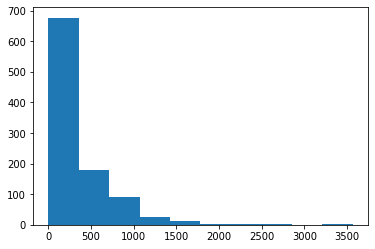

In [ ]:
def results(values):

  total = list(values)

  %matplotlib inline
  import matplotlib.pyplot as plt
  import numpy as np

  print(f"Média: {np.mean(total)}")
  print(f"Desvio Padrão: {np.std(total)}")
  print(f"Máximo: {np.max(total)}")
  print(f"Mínimo: {np.min(total)}")
  plt.hist(total)

results(total_minutes_by_account.values())

Aqui é possível ver um problema, estamos analisando para os alunos da primeira semana, mas o número máximo de minutos é mais de uma semana, agora vamos descobrir o porque.

In [ ]:
student_max = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
  if total_minutes > max_minutes:
    max_minutes = total_minutes
    student_max = student
print(student_max, max_minutes)

163 3564.7332644989997


In [ ]:
for engagement_record in paid_engagement_first_week:
  if engagement_record['account_key'] == student_max:
    print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_c

Aqui ja podemos ver um bug, o primeiro registro é de janeiro e o último de abril, mas devia ser apenas os da primeira semana.<br>
E qual é o erro então? <br>
O erro está na função que 'whithin one week' caso o aluno se inscreva e cancele a matrícula, mas logo depois faça a inscrição denovo, os 7 dias estarão contando desde a primeira matrícula <br>
para corrigir isto basta colocar uma outra condição na função, onde time_diff seja maior ou igual a 0. <br>
Obs: **Com essa correção na função, alguns comentários acima podem não fazer sentido mais para o momento atual do código.**



#Analisando o número de lições completadas na primeira semana

Média: 1.636180904522613
Desvio Padrão: 3.002561299829423
Máximo: 36
Mínimo: 0


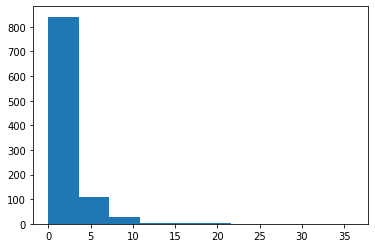

In [ ]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
results(lessons_completed_by_account.values())

Aqui é analisado os dias em que o aluno visitou algum curso, e isso foi feito adicionando uma nova chave no dicionário 'paid_engagements' chamada 'has_visited' que vale 1 se o aluno não visitou nenhum curso e 0 se o aluno visitou algum curso.

Média: 2.8673366834170855
Desvio Padrão: 2.2551980029196814
Máximo: 7
Mínimo: 0


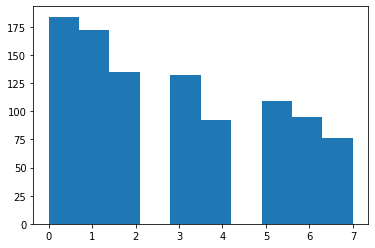

In [ ]:
days_visited = sum_grouped_items(engagement_by_account, 'has_visited')
results(days_visited.values())

#Analisando quais alunos passaram no primeiro projeto

In [ ]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
  project = submission['lesson_key']
  rating = submission['assigned_rating']
  if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
    pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

647

In [ ]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_first_week:
  if engagement_record['account_key'] in pass_subway_project:
    passing_engagement.append(engagement_record)
  else:
    non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


passing_students: 
Média: 2.052550231839258
Desvio Padrão: 3.1422270555779344
Máximo: 36
Mínimo: 0
non_passing_students: 
Média: 0.8620689655172413
Desvio Padrão: 2.5491599418312028
Máximo: 27
Mínimo: 0


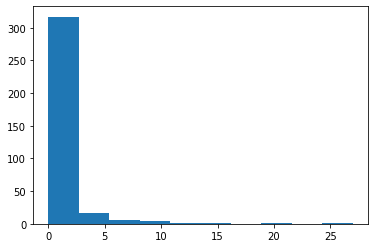

In [ ]:
passing_engagement_dict = group_data(passing_engagement, 'account_key')
print("passing_students: ")
lessons_completed_by_passing_students = sum_grouped_items(passing_engagement_dict, 'lessons_completed')
results(lessons_completed_by_passing_students.values())

non_passing_engagement_dict = group_data(non_passing_engagement, 'account_key')
print("non_passing_students: ")
lessons_completed_by_non_passing_students = sum_grouped_items(non_passing_engagement_dict, 'lessons_completed')
results(lessons_completed_by_non_passing_students.values())

passing_students: 
Média: 394.58604648350865
Desvio Padrão: 448.4995193265521
Máximo: 3564.7332644989997
Mínimo: 0.0
non_passing_students: 
Média: 143.32647426675584
Desvio Padrão: 269.5386190114951
Máximo: 1768.5227493319999
Mínimo: 0.0


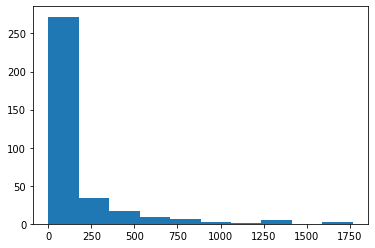

In [ ]:
print("passing_students: ")
total_minutes_passing_students = sum_grouped_items(passing_engagement_dict, 'total_minutes_visited')
results(total_minutes_passing_students.values())
print("non_passing_students: ")
total_minutes_non_passing_students = sum_grouped_items(non_passing_engagement_dict, 'total_minutes_visited')
results(total_minutes_non_passing_students.values())

passing_students: 
Média: 3.384853168469861
Desvio Padrão: 2.2588214709184595
Máximo: 7
Mínimo: 0
non_passing_students: 
Média: 1.9051724137931034
Desvio Padrão: 1.9057314413619046
Máximo: 7
Mínimo: 0


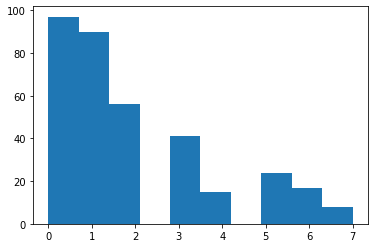

In [ ]:
print("passing_students: ")
days_visited_passing_students = sum_grouped_items(passing_engagement_dict, 'has_visited')
results(days_visited_passing_students.values())
print("non_passing_students: ")
days_visited_non_passing_students = sum_grouped_items(non_passing_engagement_dict, 'has_visited')
results(days_visited_non_passing_students.values())

#Criando histogramas para ter uma visualização melhor dos dados

Text(0.5, 0, 'Lessons completed')

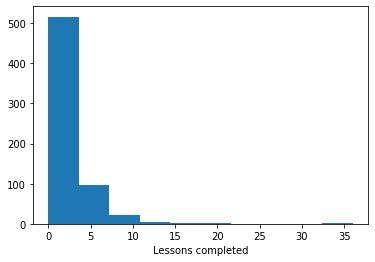

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
lessons_completed_passing_students_list = list(lessons_completed_by_passing_students.values())
plt.hist(lessons_completed_passing_students_list)
plt.xlabel('Lessons completed')

Text(0.5, 0, 'Lessons completed')

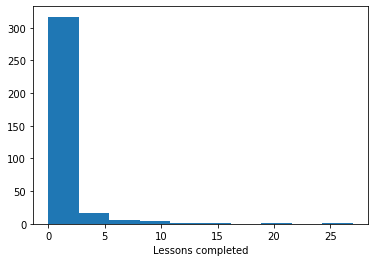

In [ ]:
lessons_completed_non_passing_students_list = list(lessons_completed_by_non_passing_students.values())
plt.hist(lessons_completed_non_passing_students_list)
plt.xlabel('Lessons completed')

Text(0.5, 0, 'Total minutes spent')

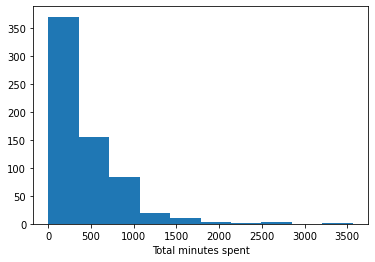

In [ ]:
total_minutes_passing_students_list = list(total_minutes_passing_students.values())
plt.hist(total_minutes_passing_students_list)
plt.xlabel('Total minutes spent')

Text(0.5, 0, 'Total minutes spent')

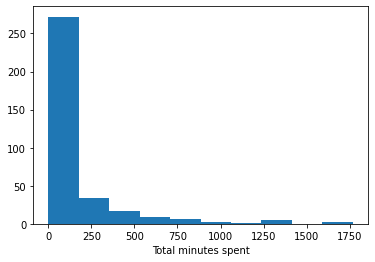

In [ ]:
total_minutes_non_passing_students_list = list(total_minutes_non_passing_students.values())
plt.hist(total_minutes_non_passing_students_list)
plt.xlabel('Total minutes spent')

Text(0.5, 0, 'Days visited')

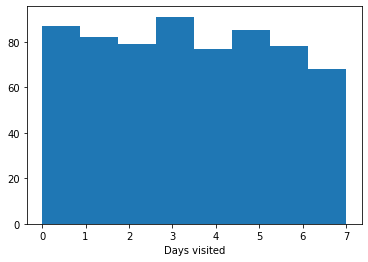

In [ ]:
days_visited_passing_students_list = list(days_visited_passing_students.values())
plt.hist(days_visited_passing_students_list, bins=8)
plt.xlabel('Days visited')

Text(0.5, 0, 'Days visited')

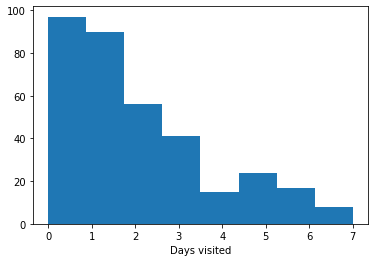

In [ ]:
days_visited_non_passing_students_list = list(days_visited_non_passing_students.values())
plt.hist(days_visited_non_passing_students_list, bins=8)
plt.xlabel('Days visited')

#Possíveis conclusões

Agora que chegamos ao final da análise podemos ter algumas **possíveis** conclusões

Primeiramente uma possível conclusão: Os alunos que passaram no projeto gastaram mais tempo na sala de aula durante a primeira semana. <br>
**OBS: Isso é uma possível conclusão porém não podemos ter certeza disso e para confirmar seria necessário utilizar estatística.**

Outra possível conclusão é que os alunos que passaram no primeiro projeto tem mais chances de visitar a sala de aula mais vezes na primeira semana, mas isso não significa que visitar a sala de aula várias vezes na primeira semana implica que o aluno vai passar no primeiro projeto.

Podemos então listar alguns fatos que podem causar com que o aluno visite a sala de aula e passe no projeto:
- Nível de interesse: Os alunos que não acharam os cursos interessantes não visitaram a sala de aula muitas vezes e consequentemente não tiveram interesse em finalizar o projeto.
- Requisitos necessários: Os alunos que não tenham o conhecimento necessário em programação para realizar o curso podem ter se sentido desmotivados pois não conseguiriam cumprir os desafios. Uma forma de resolver isso é criar um curso básico de programação.

Outro caso **possível** é o que foi dito acima, pode ser que visitar a sala de aula mais vezes na primeira semana implica que o aluno vai passar no projeto.